# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from datetime import datetime
import seaborn as sns

# Load match results

In [2]:
%pwd

'/Users/calebcastleberry/Documents/GitHub/OWL/ELO Analysis'

In [3]:
%cd '/Users/calebcastleberry/Documents/Github/OWL/Data'

/Users/calebcastleberry/Documents/GitHub/OWL/Data


In [4]:
map_results = pd.read_csv('Match Summary Data.csv', index_col=0)

In [5]:
map_results = map_results.sort_values(by=['Date', 'Map Number'],ascending=True).reset_index(drop=True)
map_results.head(12)

,Date,Map Name,Map Number,Map Type,Match Id,Team A,Team B,Winner
0,2018-01-11,Dorado,1,Escort,2381,LDN,FLA,Team B
1,2018-01-11,Junkertown,1,Escort,2380,DAL,SEO,Team A
2,2018-01-11,Dorado,1,Escort,2379,SHD,GLA,Team B
3,2018-01-11,Dorado,1,Escort,2375,SFS,VAL,Team B
4,2018-01-11,Temple of Anubis,2,Assault,2381,LDN,FLA,Team A
5,2018-01-11,Temple of Anubis,2,Assault,2380,DAL,SEO,Team B
6,2018-01-11,Temple of Anubis,2,Assault,2379,SHD,GLA,Team B
7,2018-01-11,Temple of Anubis,2,Assault,2375,SFS,VAL,Team B
8,2018-01-11,Oasis,3,KOTH,2381,LDN,FLA,Team A
9,2018-01-11,Ilios,3,KOTH,2380,DAL,SEO,Team B


In [6]:
map_results[(map_results["Team A"]=='GLA') | (map_results["Team B"]=='GLA')]

,Date,Map Name,Map Number,Map Type,Match Id,Team A,Team B,Winner
2,2018-01-11,Dorado,1,Escort,2379,SHD,GLA,Team B
6,2018-01-11,Temple of Anubis,2,Assault,2379,SHD,GLA,Team B
10,2018-01-11,Ilios,3,KOTH,2379,SHD,GLA,Team B
14,2018-01-11,Eichenwalde,4,Hybrid,2379,SHD,GLA,Team B
25,2018-01-13,Junkertown,1,Escort,2404,SEO,GLA,Team A
31,2018-01-13,Horizon Lunar Colony,2,Assault,2404,SEO,GLA,Team A
37,2018-01-13,Ilios,3,KOTH,2404,SEO,GLA,Team A
43,2018-01-13,Numbani,4,Hybrid,2404,SEO,GLA,Team A
65,2018-01-19,Junkertown,1,Escort,2410,PHI,GLA,Team A
67,2018-01-19,Temple of Anubis,2,Assault,2410,PHI,GLA,Team A


# Create ELO Dataframe

In [7]:
team_list = list(map_results["Team A"].unique())
team_elo_start = []

In [8]:
for team in team_list:
    team_elo = {
        "date": datetime.strptime('2018-1-1', '%Y-%m-%d'),
        "team": team, 
        "elo": 1000,
        "map number": 0
    }
    team_elo_start.append(team_elo)

In [9]:
team_elo_start

[{'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'LDN'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'DAL'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'SHD'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'SFS'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'BOS'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'PHI'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'SEO'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'NYE'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'FLA'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'VAL'},
 {'date': 

In [10]:
elo_df = pd.DataFrame(team_elo_start)

In [11]:
elo_df.head(12)

,date,elo,map number,team
0,2018-01-01,1000,0,LDN
1,2018-01-01,1000,0,DAL
2,2018-01-01,1000,0,SHD
3,2018-01-01,1000,0,SFS
4,2018-01-01,1000,0,BOS
5,2018-01-01,1000,0,PHI
6,2018-01-01,1000,0,SEO
7,2018-01-01,1000,0,NYE
8,2018-01-01,1000,0,FLA
9,2018-01-01,1000,0,VAL


# Elo Function

In [12]:
test_elo_a = 1200
test_elo_b = 1100

In [13]:
def elo_probabilities(elo_a, elo_b):
    q_a = 10**(elo_a/400)
    q_b = 10**(elo_b/400)
    e_a = q_a / (q_a + q_b)
    e_b = q_b / (q_a + q_b)
    return e_a, e_b

def update_elo(elo_a, elo_b, a_win, K=20):
    q_a = 10**(elo_a/400)
    q_b = 10**(elo_b/400)
    e_a = q_a / (q_a + q_b)
    e_b = q_b / (q_a + q_b)
    
    
    r_a = elo_a + K * (a_win - e_a)
    r_b = elo_b + K * ((1-a_win) - e_b)
    return r_a, r_b

In [14]:
elo_probabilities(test_elo_a, test_elo_b)

(0.6400649998028851, 0.35993500019711494)

In [15]:
update_elo(test_elo_a, test_elo_b, 1)

(1207.1987000039423, 1092.8012999960577)

In [16]:
update_elo(test_elo_a, test_elo_b, 0)

(1187.1987000039423, 1112.8012999960577)

## Get current elo

In [17]:
def get_current_elo(df, team, date):
    df = df[(df["team"]== team) & (df['date'] <= date) ]
    df = df.sort_values(by=['date', 'map number'], ascending=False).reset_index(drop=True)
    elo = df.iloc[0]['elo']
    return elo

def get_current_map_number(df, team, date):
    df = df[(df["team"]== team) & (df['date'] <= date) ]
    df = df.sort_values(by='map number', ascending=False).reset_index(drop=True)
    elo = df.iloc[0]['map number']
    return elo

In [18]:
print(get_current_elo(elo_df, 'SEO', datetime.strptime('2018-1-2', '%Y-%m-%d')))
get_current_map_number(elo_df, "SEO", datetime.strptime('2018-1-2', '%Y-%m-%d'))

1000


0

# Loop through map result frame and update elo

In [19]:
current_map =  map_results.iloc[0]
current_map

Date          2018-01-11
Map Name          Dorado
Map Number             1
Map Type          Escort
Match Id            2381
Team A               LDN
Team B               FLA
Winner            Team B
Name: 0, dtype: object

In [20]:
map_results.shape[0]

241

In [21]:
for i in range(map_results.shape[0]):
    current_map = map_results.iloc[i]
    map_name = current_map['Map Name']
    team_a = current_map['Team A']
    team_b = current_map['Team B']
    match_date = datetime.strptime(current_map['Date'], '%Y-%m-%d')
    winner = current_map['Winner']
    if winner=='Team A':
        a_win = 1
    elif winner=='Team B':
        a_win = 0
    else:
        a_win = 0.5
        
    a_elo = get_current_elo(elo_df, team_a, match_date)
    b_elo = get_current_elo(elo_df, team_b, match_date)
    a_map = get_current_map_number(elo_df, team_a, match_date) + 1
    b_map = get_current_map_number(elo_df, team_b, match_date) + 1
    new_a_row = {
        'date': match_date,
        'team': team_a,
        'map number': a_map
    }
    new_b_row = {
        'date': match_date,
        'team': team_b,
        'map number': b_map
    }
    new_a_row['elo'], new_b_row['elo'] = update_elo(a_elo, b_elo, a_win=a_win, K=20)
    temp_df = pd.DataFrame([new_a_row, new_b_row])
    #print(temp_df.head())
    elo_df = pd.concat([elo_df, temp_df])
    #print(elo_df.tail())
    #print(map_name, i, team_a, a_elo, team_b, b_elo, a_win, match_date)
    #print(new_a_row)
    #print(new_b_row)

In [22]:
elo_df.sort_values(by='date',ascending=False).iloc[0]

date          2018-02-10 00:00:00
elo                       947.991
map number                     42
team                          SFS
Name: 1, dtype: object

In [23]:
elo_df = elo_df.sort_values(by=['date', 'map number'], ascending=False).reset_index(drop=True)

In [24]:
elo_df.head()

,date,elo,map number,team
0,2018-02-10,1032.091066,43,SEO
1,2018-02-10,1078.271323,42,VAL
2,2018-02-10,834.301673,42,SHD
3,2018-02-10,1024.022631,42,SEO
4,2018-02-10,933.352309,42,GLA


In [25]:
elo_df['day map'] = elo_df['date'].apply(lambda x: x.day) + .02 * elo_df['map number']

In [26]:
team_elo_dfs = {}
for team in team_list:
    temp_elo_df = elo_df[elo_df["team"]==team]
    team_elo_dfs[team] = temp_elo_df

In [27]:
SHD_elo = elo_df[elo_df["team"]=='SHD']
SHD_elo

,date,elo,map number,team,day map
2,2018-02-10,834.301673,42,SHD,10.84
8,2018-02-10,838.395354,41,SHD,10.82
14,2018-02-10,842.650855,40,SHD,10.80
20,2018-02-10,847.079669,39,SHD,10.78
50,2018-02-08,851.694385,38,SHD,8.76
58,2018-02-08,860.127359,37,SHD,8.74
65,2018-02-08,847.881329,36,SHD,8.72
71,2018-02-08,856.088374,35,SHD,8.70
74,2018-02-08,864.783854,34,SHD,8.68
90,2018-02-03,852.808819,33,SHD,3.66


## Analysis

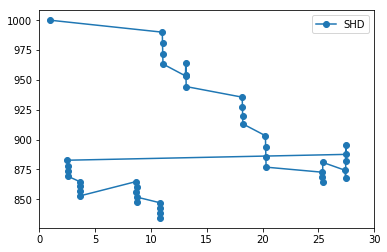

In [28]:
plt.plot(SHD_elo['day map'], SHD_elo['elo'], label='SHD', marker='o')
plt.xlim([0,30])
plt.legend()
plt.show()

In [29]:
from matplotlib import colors as mcolors

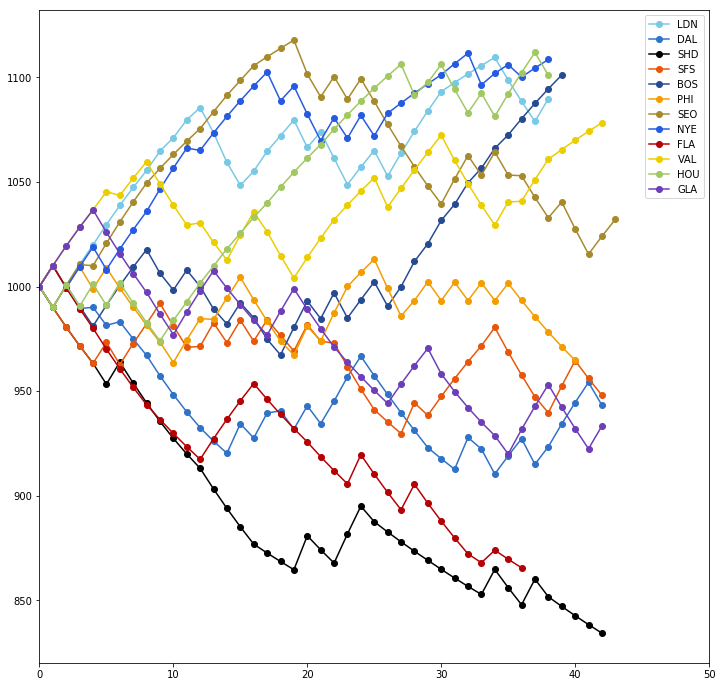

In [32]:
colors = {
    'LDN': '#78c9e5',
    'DAL': '#2f72c7',
    'SHD': '#000000',
    'SFS': '#e85609',
    'BOS': '#264b92',
    'PHI': '#f49d00',
    'SEO': '#a78a2c',
    'NYE': '#265ae1',
    'FLA': '#b50004',
    'VAL': '#eace00',
    'HOU': '#a1c861',
    'GLA': '#6d3eb9'
}
plt.figure(figsize=(12,12))
for key, value in team_elo_dfs.items():
    plt.plot(value['map number'], value['elo'], label=key, marker='o', color=colors[key])
plt.xlim([0,50])
plt.legend()
plt.savefig('OWL_ELO.png')
#plt.show()

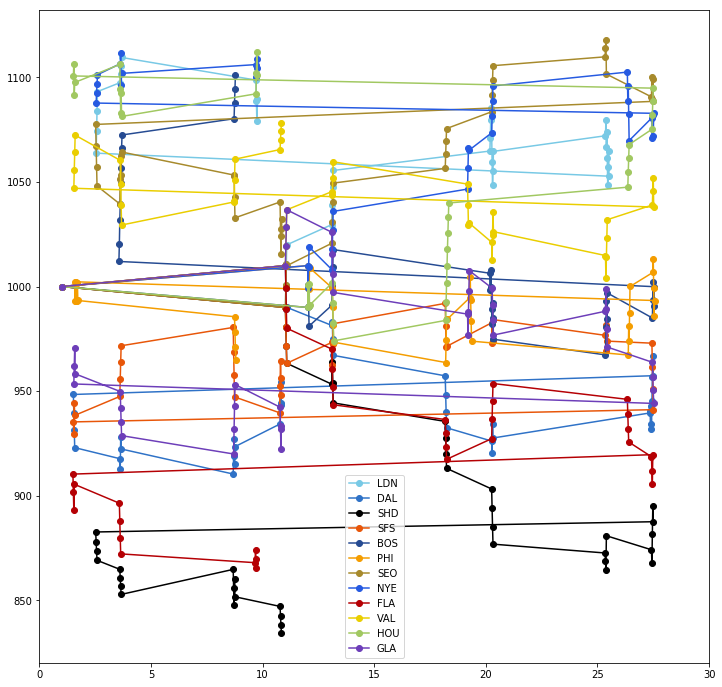

In [33]:
plt.figure(figsize=(12,12))
for key, value in team_elo_dfs.items():
    plt.plot(value['day map'], value['elo'], label=key, marker='o', color=colors[key])
plt.xlim([0,30])
plt.legend()
plt.show()